<a href="https://colab.research.google.com/github/ShadyGirgis79/Leaf-Classification/blob/main/Leaf_Classification_without_Removing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leaf Classification Dataset**

#1. Data Preparation

In [ ]:
!pip install opencv-python
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

import os
import cv2
import glob as gb

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

# Upload the dataset
from google.colab import drive
from google.colab import files

In [ ]:
# Mount Google Drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


In [ ]:
print("Load the training dataset (train.csv):")
train_file = '/content/drive/MyDrive/Projects/Leaf Classification/train.csv'

Load the training dataset (train.csv):


##1.1 Describe The Data

In [ ]:
# Load CSV
Leaf = pd.read_csv('/content/drive/MyDrive/Projects/Leaf Classification/train.csv')

# Inspect Data
Leaf.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
Leaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
# Set the path to your image folder
image_folder = '/content/drive/MyDrive/Projects/Leaf Classification/images'

# List image files
image_files = os.listdir(image_folder)
print(f"Total images: {len(image_files)}")

Total images: 1584


In [ ]:
# Map images to their IDs
image_paths = {int(os.path.splitext(file)[0]): os.path.join(image_folder, file) for file in image_files}

# Check if IDs in the CSV match with image files
matched_ids = Leaf['id'].isin(image_paths.keys())
print(f"Matched IDs: {matched_ids.sum()} / {len(Leaf)}")

Matched IDs: 990 / 990


##1.3 Check For Nulls/Duplicates

In [ ]:
print(Leaf.shape)
Leaf.info()

(990, 194)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
Leaf.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [ ]:
Leaf.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
Leaf.isnull().sum()

,0
id,0
species,0
margin1,0
margin2,0
margin3,0
...,...
texture60,0
texture61,0
texture62,0
texture63,0


In [ ]:
Leaf.duplicated().sum()

0

##1.4 Visualization

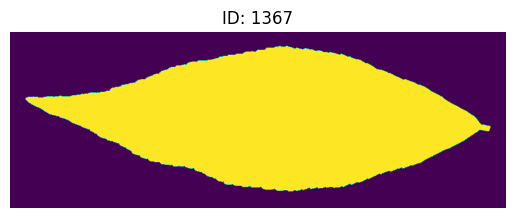

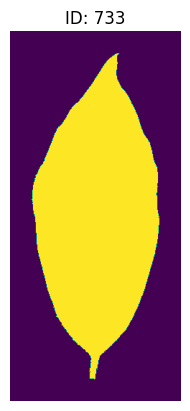

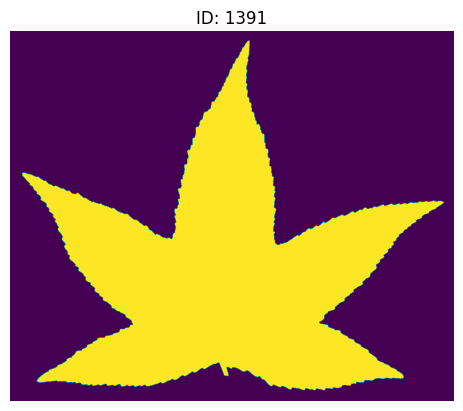

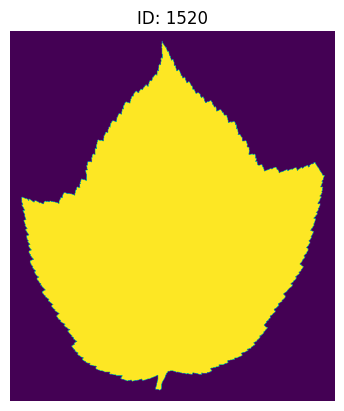

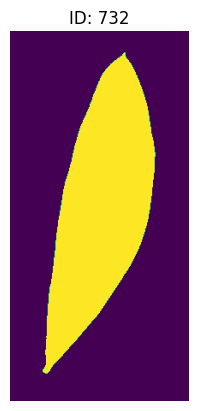

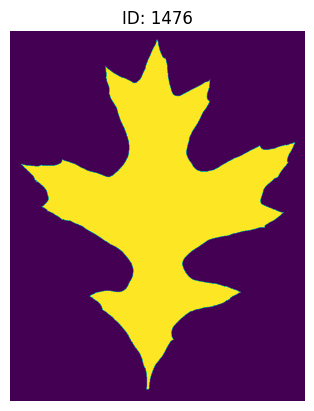

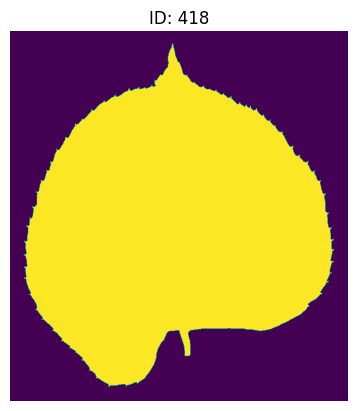

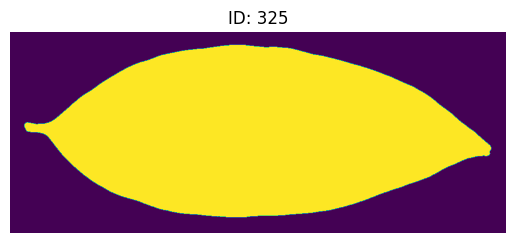

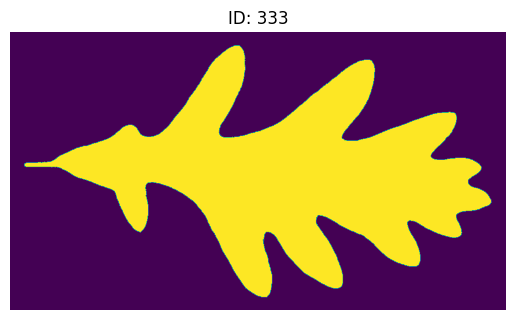

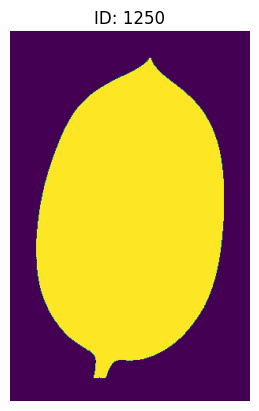

In [ ]:
# Display sample images
sample_ids = Leaf['id'].sample(10)  # Randomly select 10 IDs
for sample_id in sample_ids:
    if sample_id in image_paths:
        image_path = image_paths[sample_id]
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f"ID: {sample_id}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found for ID: {sample_id}")


##1.5 Correlation Analysis

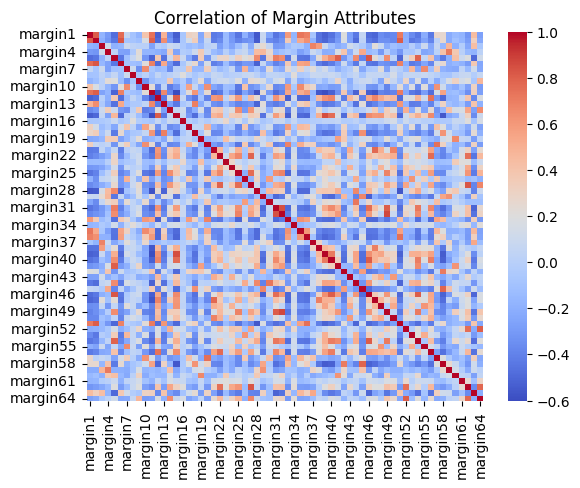

In [ ]:
# Compute Correlation
correlation = Leaf.filter(like='margin').corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation of Margin Attributes')
plt.show()

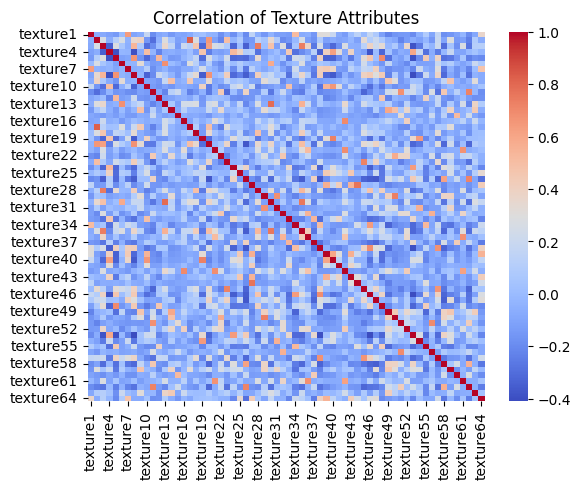

In [ ]:
# Compute Correlation
correlation = Leaf.filter(like='texture').corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation of Texture Attributes')
plt.show()

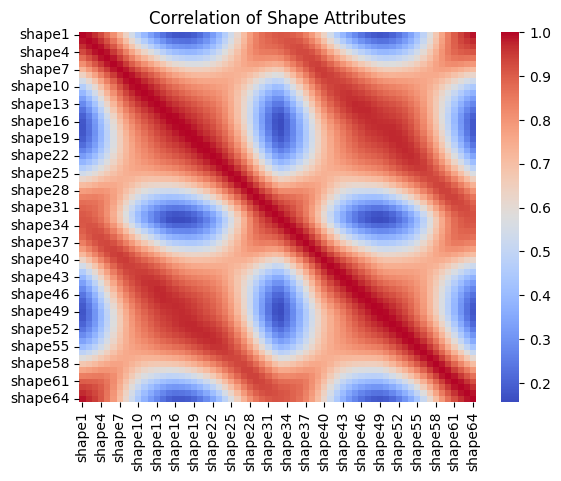

In [ ]:
# Compute Correlation
correlation = Leaf.filter(like='shape').corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation of Shape Attributes')
plt.show()

In [ ]:
X = Leaf.drop(columns=['species'])
y = Leaf['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training labels size: {y_train.shape}")
print(f"Testing labels size: {y_test.shape}")

Training set size: (792, 193)
Testing set size: (198, 193)
Training labels size: (792,)
Testing labels size: (198,)


# 4. Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder and encode the 'species' column
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# 5. CNN Model

## 5.1 preprocess the image before CNN

In [ ]:
matched_ids = X['id'].isin(image_paths.keys())
print(f"Matched IDs: {matched_ids.sum()} / {len(Leaf)}")

Matched IDs: 990 / 990


In [ ]:
# Filter the dataset to keep only matched IDs
X_train = X_train[X_train['id'].isin(image_paths.keys())]
# Add image paths to the dataframe
X_train['image_path'] = X_train['id'].map(image_paths)

# Filter the dataset to keep only matched IDs
X_test = X_test[X_test['id'].isin(image_paths.keys())]
# Add image paths to the dataframe
X_test['image_path'] = X_test['id'].map(image_paths)


## Model Architecture

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Concatenate
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Prepare images and non-image features
def prepare_data(df, target_size=(192, 192)):
    # Load images
    X_images = []
    for _, row in df.iterrows():
        img = load_img(row['image_path'], target_size=target_size, color_mode='grayscale')
        img_array = img_to_array(img)  # Convert image to numpy array
        X_images.append(img_array)

    X_images = np.array(X_images) / 255.0  # Normalize the images

    # Prepare non-image features (margins, shapes, textures)
    feature_columns = [col for col in df.columns if col not in ['id', 'image_path', 'species']]
    X_features = df[feature_columns].values

    # Normalize the feature columns
    scaler = StandardScaler()
    X_features = scaler.fit_transform(X_features)

    return X_images, X_features

# Split the dataframe into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Prepare the data
X_train_images, X_train_features = prepare_data(X_train)
X_val_images, X_val_features = prepare_data(X_val)
X_test_images, X_test_features = prepare_data(X_test)

# Create the augmented data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images to [0, 1]
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zooming
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'  # Fill in missing pixels after transformation
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation set

### Original Model Architecture

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.2)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.5)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model1 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 192, 192, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 192, 192, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 192, 192, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 96, 96, 64)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 96, 96, 128)    │            512 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 48, 48, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 128)            │              0 │ max_pooling2d_1[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 320)            │              0 │ global_average_poolin… │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         41,088 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │         16,640 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ dense_2[0][0]          │
├──────────────────────

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model

In [ ]:
epochs = 64
history = model1.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model1.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 754ms/step - accuracy: 0.0114 - loss: 4.6163 - val_accuracy: 0.0063 - val_loss: 4.5946
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.0060 - loss: 4.6080 - val_accuracy: 0.0189 - val_loss: 4.5775
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0284 - loss: 4.5733 - val_accuracy: 0.0189 - val_loss: 4.5581
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0230 - loss: 4.5354 - val_accuracy: 0.0189 - val_loss: 4.5379
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0253 - loss: 4.5043 - val_accuracy: 0.0252 - val_loss: 4.5178
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0258 - loss: 4.4935 - val_accuracy: 0.0377 - val_loss: 4.4976
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0677 - loss: 4.4128 - val_accuracy: 0.0440 - val_loss: 4.4739
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0610 - loss: 4.4145 - val_accuracy: 0.0566 

### Plot Diagram

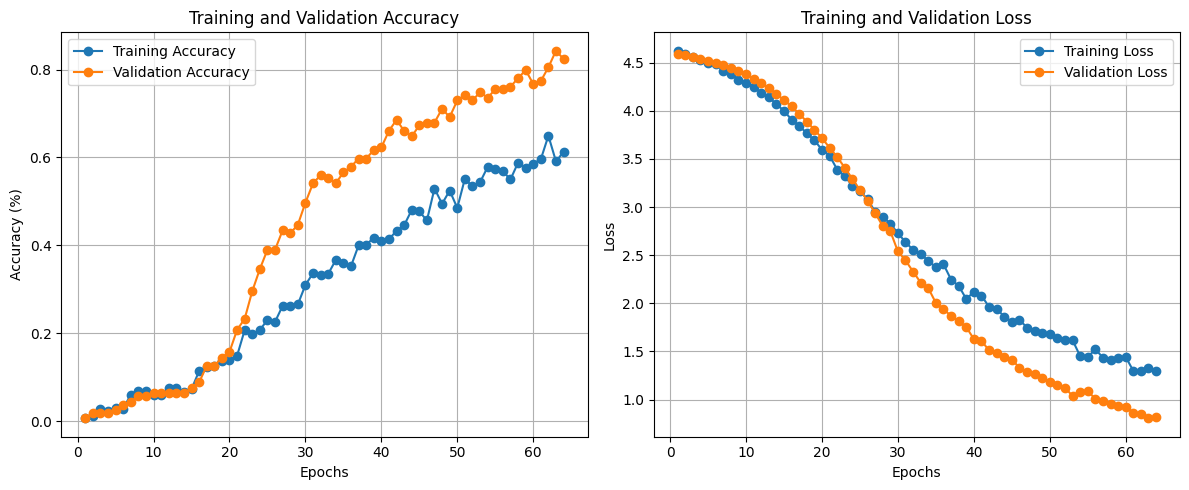

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Changing learning rate

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.2)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.5)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model1 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 192, 192, 64)   │            640 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 192, 192, 64)   │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 96, 96, 64)     │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 96, 96, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 48, 48, 128)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_3[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 128)            │         41,088 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │          8,256 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64)             │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 256)            │         16,640 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)  

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model

In [ ]:
epochs = 64
history = model1.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model1.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 367ms/step - accuracy: 0.0100 - loss: 4.6493 - val_accuracy: 0.0755 - val_loss: 4.4675
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.0795 - loss: 4.3541 - val_accuracy: 0.0943 - val_loss: 4.1817
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.1397 - loss: 3.8975 - val_accuracy: 0.1950 - val_loss: 3.5359
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2495 - loss: 3.2202 - val_accuracy: 0.3836 - val_loss: 2.6828
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3439 - loss: 2.5819 - val_accuracy: 0.5157 - val_loss: 2.0926
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3719 - loss: 2.2637 - val_accuracy: 0.6415 - val_loss: 1.6494
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4710 - loss: 1.8345 - val_accuracy: 0.6730 - val_loss: 1.4743
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5393 - loss: 1.5248 - val_accuracy: 0.6918 -

### Plot Diagram

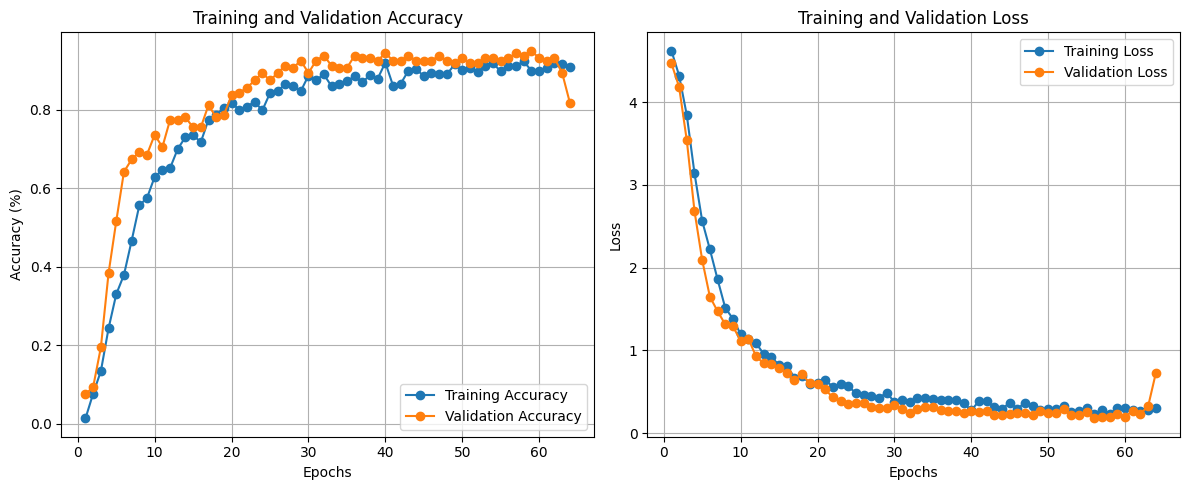

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Increase number of layers

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.2)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.5)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model2 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 192, 192, 64)   │            640 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 192, 192, 64)   │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 96, 96, 64)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 96, 96, 128)    │            512 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 48, 48, 128)    │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 48, 48, 256)    │        295,168 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 48, 48, 256)    │          1,024 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 24, 24, 256)    │              0 │ batch_normalization_6… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 24, 24, 512)    │      1,180,160 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 24, 24, 512)    │          2,048 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 12, 12, 512)    │              0 │ batch_normalization_7… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 512)            │              0 │ max_pooling2d_7[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5        

 Total params: 1,851,171 (7.06 MB)

 Trainable params: 1,849,251 (7.05 MB)

 Non-trainable params: 1,920 (7.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model2.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model2.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 846ms/step - accuracy: 0.0145 - loss: 4.6331 - val_accuracy: 0.0252 - val_loss: 4.5889
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.0234 - loss: 4.5814 - val_accuracy: 0.0252 - val_loss: 4.5782
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.0263 - loss: 4.5600 - val_accuracy: 0.0377 - val_loss: 4.5678
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.0137 - loss: 4.5324 - val_accuracy: 0.0314 - val_loss: 4.5548
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.0253 - loss: 4.5083 - val_accuracy: 0.0377 - val_loss: 4.5405
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.0369 - loss: 4.4812 - val_accuracy: 0.0503 - val_loss: 4.5325
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.0486 - loss: 4.4532 - val_accuracy: 0.0377 - val_loss: 4.5143
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.0487 - loss: 4.3425 - val_accuracy: 0

### Plot Diagram

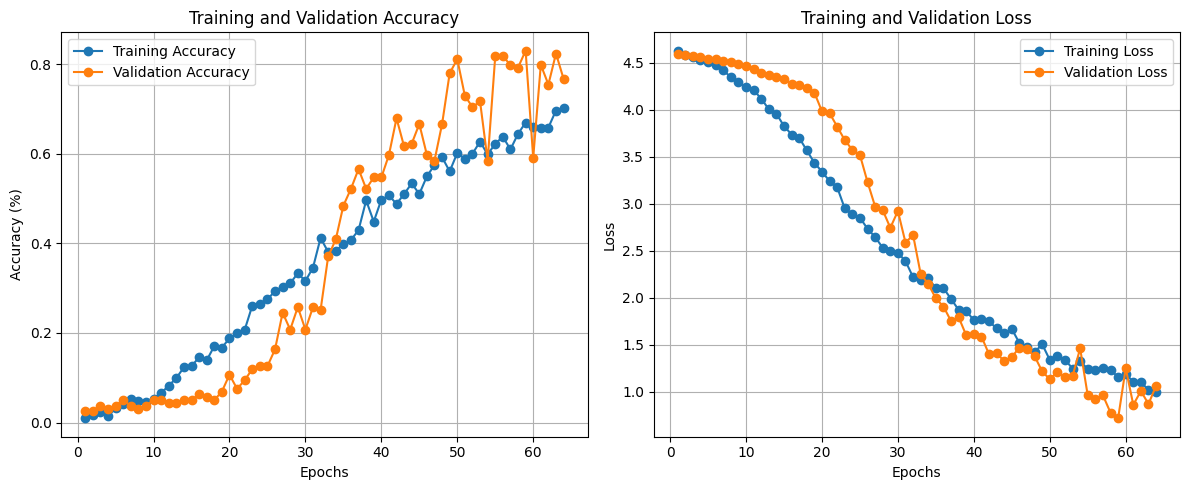

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Increasing batch size

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=64)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.2)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.5)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model3 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 192, 192, 64)   │            640 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 192, 192, 64)   │            256 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 96, 96, 64)     │              0 │ batch_normalization_8… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 96, 96, 128)    │            512 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 48, 48, 128)    │              0 │ batch_normalization_9… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_9[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │         41,088 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 128)            │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 64)             │          8,256 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 64)             │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 256)            │         16,640 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout) 

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model3.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model3.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model3.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.0067 - loss: 4.6507 - val_accuracy: 0.0377 - val_loss: 4.5897
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0122 - loss: 4.6126 - val_accuracy: 0.0440 - val_loss: 4.5719
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0195 - loss: 4.5783 - val_accuracy: 0.0629 - val_loss: 4.5521
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0234 - loss: 4.5387 - val_accuracy: 0.0755 - val_loss: 4.5319
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0454 - loss: 4.5369 - val_accuracy: 0.0818 - val_loss: 4.5134
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0491 - loss: 4.4823 - val_accuracy: 0.0755 - val_loss: 4.4914
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.0503 - loss: 4.4576 - val_accuracy: 0.0692 - val_loss: 4.4673
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0527 - loss: 4.4328 - val_accuracy: 0.0818 -

### Plot Diagram

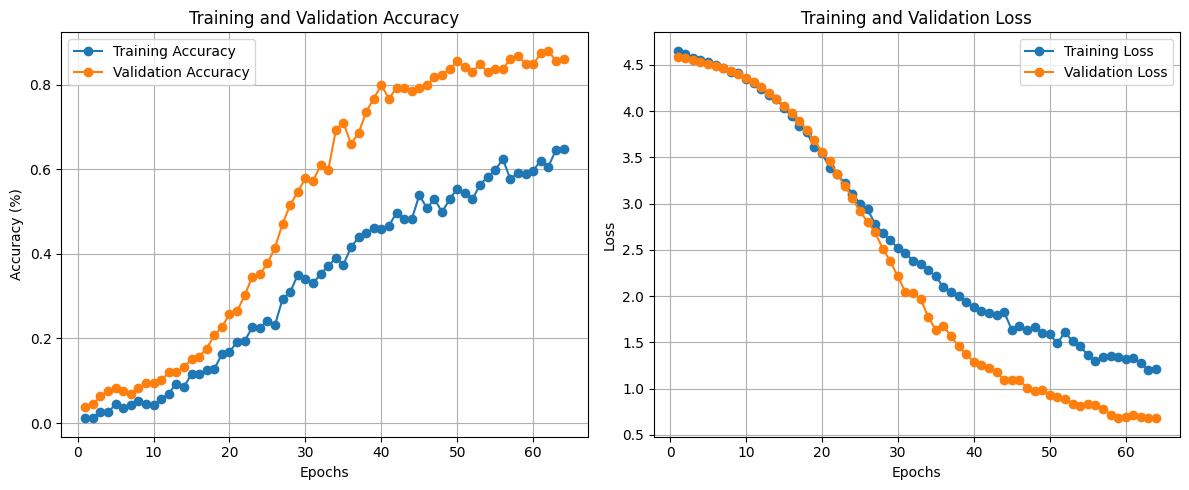

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Changing Optimizer to Adagrad

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.3)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model4 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model4.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 192, 192, 64)   │            640 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 192, 192, 64)   │            256 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 96, 96, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 96, 96, 128)    │            512 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 48, 48, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_11[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 128)            │         41,088 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 128)            │              0 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 64)             │          8,256 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 64)             │              0 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 256)            │         16,640 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout) 

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model4.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model4.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 362ms/step - accuracy: 0.0088 - loss: 4.6275 - val_accuracy: 0.0000e+00 - val_loss: 4.6134
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.0040 - loss: 4.6465 - val_accuracy: 0.0000e+00 - val_loss: 4.6120
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0051 - loss: 4.6176 - val_accuracy: 0.0000e+00 - val_loss: 4.6110
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0030 - loss: 4.6586 - val_accuracy: 0.0063 - val_loss: 4.6102
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0230 - loss: 4.6391 - val_accuracy: 0.0063 - val_loss: 4.6094
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0065 - loss: 4.6335 - val_accuracy: 0.0063 - val_loss: 4.6087
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0210 - loss: 4.6282 - val_accuracy: 0.0063 - val_loss: 4.6081
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0048 - loss: 4.6318 - val_accura

### Plot Diagram

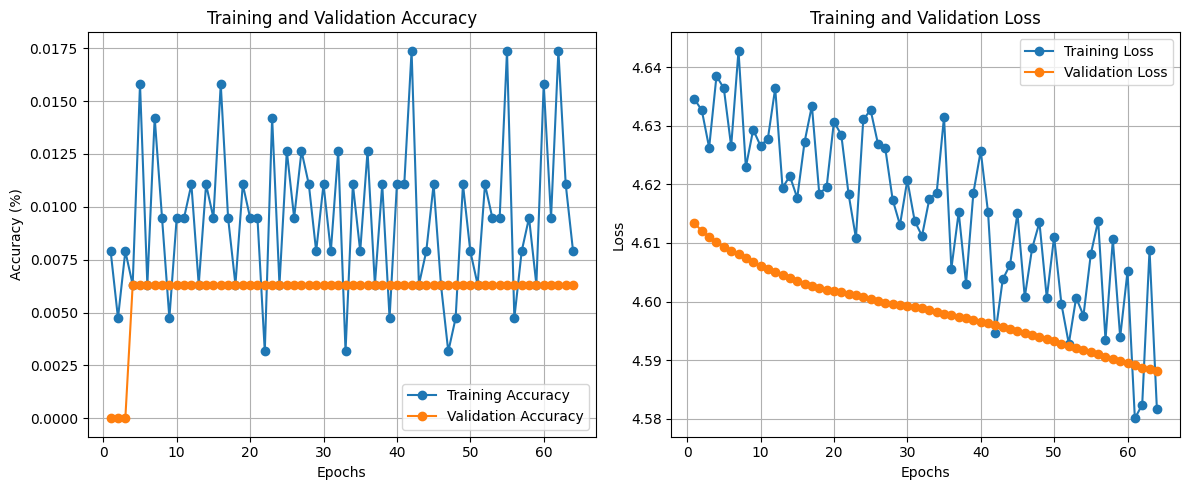

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Changing Optimizer to RMSprop

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.3)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model4 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model4.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 192, 192, 64)   │            640 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 192, 192, 64)   │            256 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 96, 96, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 96, 96, 128)    │            512 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 48, 48, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_13[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_11            │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 128)            │         41,088 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 128)            │              0 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 64)             │          8,256 │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 64)             │              0 │ dense_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 256)            │         16,640 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout) 

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model4.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model4.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.0129 - loss: 4.6355 - val_accuracy: 0.0126 - val_loss: 4.6013
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0107 - loss: 4.6002 - val_accuracy: 0.0252 - val_loss: 4.5809
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0177 - loss: 4.5660 - val_accuracy: 0.0126 - val_loss: 4.5623
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0211 - loss: 4.5347 - val_accuracy: 0.0126 - val_loss: 4.5429
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0304 - loss: 4.5076 - val_accuracy: 0.0189 - val_loss: 4.5229
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0360 - loss: 4.4550 - val_accuracy: 0.0377 - val_loss: 4.4987
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0324 - loss: 4.4494 - val_accuracy: 0.0503 - val_loss: 4.4731
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0620 - loss: 4.3986 - val_accuracy: 0.0503 -

### Plot Diagram

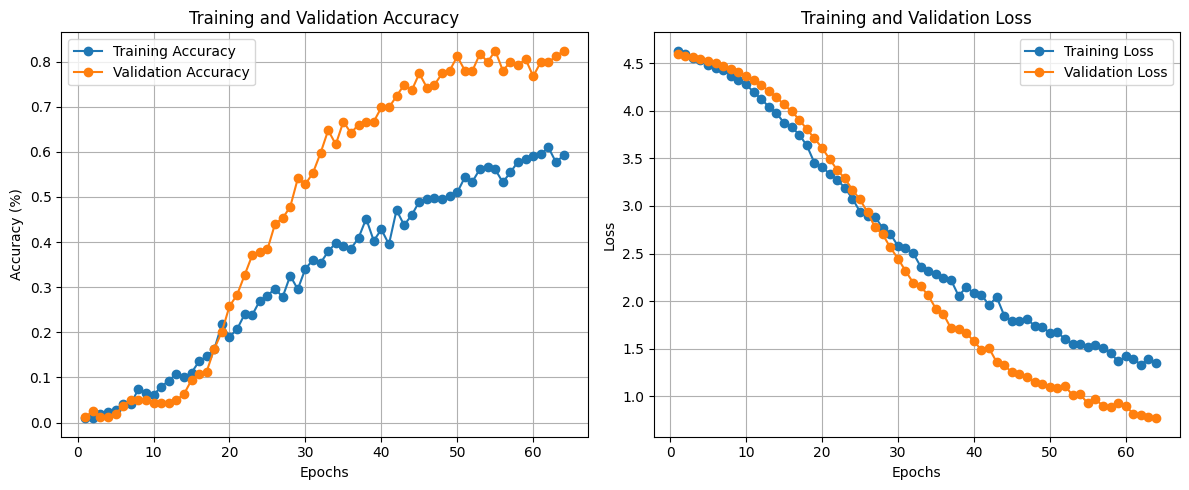

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Changing dropout rate

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.3)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.3)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model5 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model5.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 192, 192, 64)   │            640 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 192, 192, 64)   │            256 │ conv2d_14[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 96, 96, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 96, 96, 128)    │            512 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 48, 48, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_15[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_13            │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 128)            │         41,088 │ concatenate_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 128)            │              0 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 64)             │          8,256 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 64)             │              0 │ dense_31[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 256)            │         16,640 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout) 

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model5.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model5.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model5.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 367ms/step - accuracy: 0.0113 - loss: 4.6270 - val_accuracy: 0.0063 - val_loss: 4.5953
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.0123 - loss: 4.5756 - val_accuracy: 0.0063 - val_loss: 4.5769
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0094 - loss: 4.5588 - val_accuracy: 0.0189 - val_loss: 4.5553
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.0343 - loss: 4.5258 - val_accuracy: 0.0377 - val_loss: 4.5355
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0396 - loss: 4.4700 - val_accuracy: 0.0440 - val_loss: 4.5152
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0427 - loss: 4.4977 - val_accuracy: 0.0377 - val_loss: 4.4927
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0468 - loss: 4.4290 - val_accuracy: 0.0440 - val_loss: 4.4658
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.0555 - loss: 4.3935 - val_accuracy: 0.0440 

### Plot Diagram

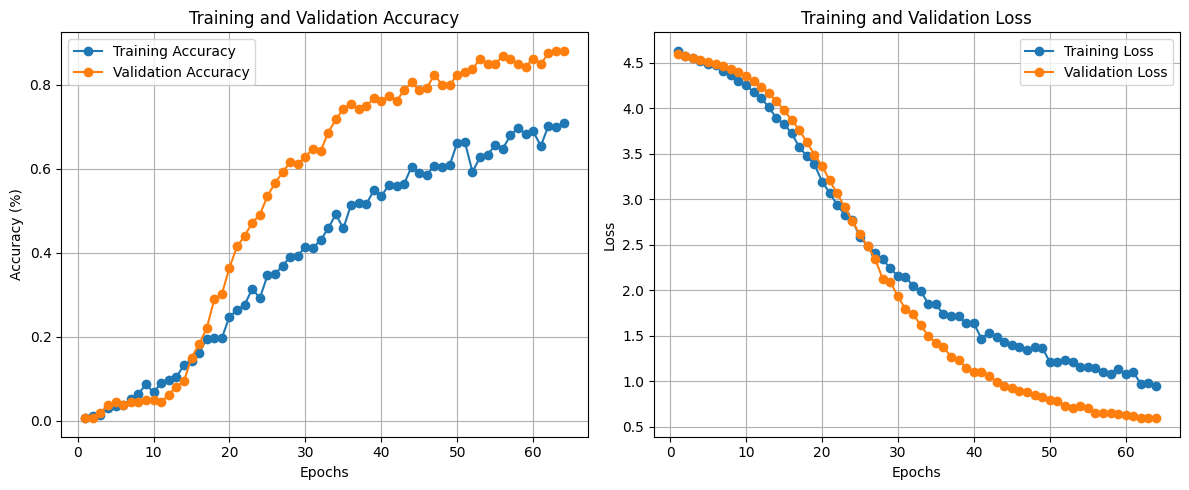

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Changing dropout rate and batch size

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=64)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.1)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.1)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.1)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model6 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model6.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 192, 192, 64)   │            640 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 192, 192, 64)   │            256 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 96, 96, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 96, 96, 128)    │            512 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_17          │ (None, 48, 48, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_17[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_15            │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 128)            │         41,088 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 128)            │              0 │ dense_35[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 64)             │          8,256 │ dropout_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 64)             │              0 │ dense_36[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_37 (Dense)          │ (None, 256)            │         16,640 │ dropout_22[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_23 (Dropout) 

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model6.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model6.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model6.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.0182 - loss: 4.6245 - val_accuracy: 0.0377 - val_loss: 4.5695
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0201 - loss: 4.5591 - val_accuracy: 0.0440 - val_loss: 4.5269
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.0701 - loss: 4.4738 - val_accuracy: 0.0629 - val_loss: 4.4759
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0821 - loss: 4.4044 - val_accuracy: 0.0943 - val_loss: 4.4192
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1228 - loss: 4.2953 - val_accuracy: 0.1195 - val_loss: 4.3378
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1199 - loss: 4.2030 - val_accuracy: 0.1069 - val_loss: 4.2365
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1740 - loss: 4.0153 - val_accuracy: 0.1132 - val_loss: 4.1025
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2307 - loss: 3.7608 - val_accuracy: 0.1321 -

### Plot Diagram

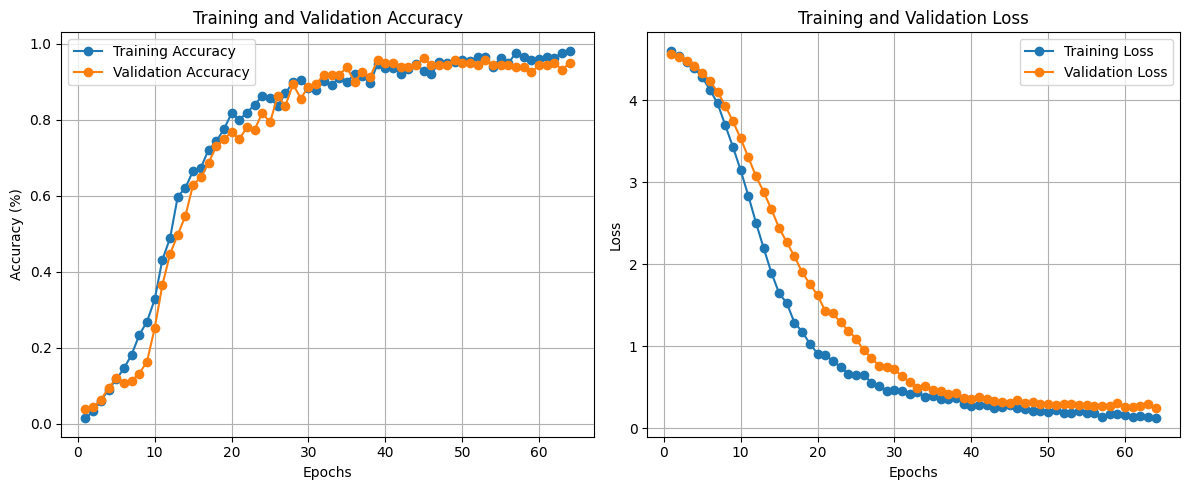

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Changing dropout rate, batch size, and learning rate

In [ ]:
# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=64)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu')(combined)
    m = Dropout(0.1)(m)

    m = Dense(64, activation='relu')(m)
    m = Dropout(0.1)(m)

    m = Dense(256, activation='relu')(m)
    m = Dropout(0.1)(m)

    m = Dense(512, activation='relu')(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model6 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model6.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 192, 192, 64)   │            640 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 192, 192, 64)   │            256 │ conv2d_18[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_18          │ (None, 96, 96, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_18[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 96, 96, 128)    │            512 │ conv2d_19[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_19          │ (None, 48, 48, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_19[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_17            │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_8             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 128)            │         41,088 │ concatenate_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_24 (Dropout)      │ (None, 128)            │              0 │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_41 (Dense)          │ (None, 64)             │          8,256 │ dropout_24[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_25 (Dropout)      │ (None, 64)             │              0 │ dense_41[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_42 (Dense)          │ (None, 256)            │         16,640 │ dropout_25[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_26 (Dropout) 

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model6.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model6.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model6.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.0234 - loss: 4.5595 - val_accuracy: 0.0692 - val_loss: 4.2652
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.1993 - loss: 3.7770 - val_accuracy: 0.2453 - val_loss: 3.1098
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4914 - loss: 2.2057 - val_accuracy: 0.5409 - val_loss: 1.9538
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6757 - loss: 1.1956 - val_accuracy: 0.6226 - val_loss: 1.4004
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8159 - loss: 0.7216 - val_accuracy: 0.6352 - val_loss: 1.3589
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8703 - loss: 0.4173 - val_accuracy: 0.7107 - val_loss: 1.2077
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9093 - loss: 0.3178 - val_accuracy: 0.6730 - val_loss: 1.2236
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9214 - loss: 0.2580 - val_accuracy: 0.6855 

### Plot Diagram

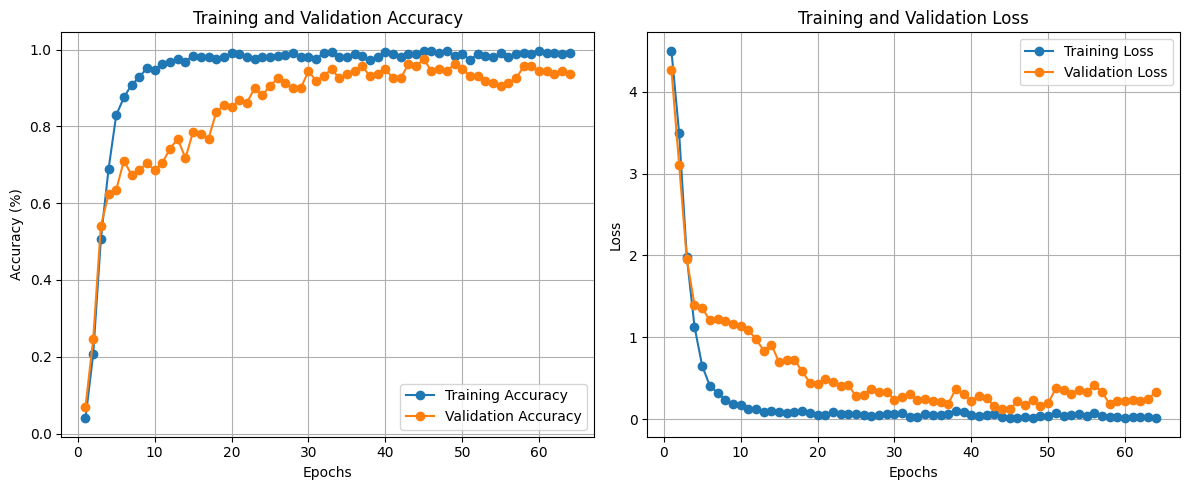

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### Replace dropout with L2 Regularization

In [ ]:
from tensorflow.keras.regularizers import l2

# Create augmented training and validation data generators
train_generator = train_datagen.flow(X_train_images, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val_images, y_val, batch_size=32)

# Define the CNN model
def create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],)):
    # Input layer for the image
    image_input = Input(shape=input_shape)

    # Convolutional layers for image processing
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # GlobalAveragePooling instead of Flatten for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Input layer for non-image features (e.g., margin, shape, texture)
    feature_input = Input(shape=feature_input_shape)

    # Concatenate the image features with non-image features
    combined = Concatenate()([x, feature_input])

    # Fully connected layers
    m = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(combined)
    m = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(m)
    m = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(m)
    m = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(m)

    # Output layer (softmax for multi-class classification)
    output = Dense(num_classes, activation='softmax')(m)

    # Create the model
    model = Model(inputs=[image_input, feature_input], outputs=output)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the model
model6 = create_leaf_classifier(input_shape=(192, 192, 1), num_classes=99, feature_input_shape=(X_train_features.shape[1],))
model6.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 192, 192, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 192, 192, 64)   │            640 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 192, 192, 64)   │            256 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 96, 96, 64)     │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 96, 96, 128)    │         73,856 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 96, 96, 128)    │            512 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_21          │ (None, 48, 48, 128)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_21[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_19            │ (None, 192)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 320)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_45 (Dense)          │ (None, 128)            │         41,088 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_46 (Dense)          │ (None, 64)             │          8,256 │ dense_45[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_47 (Dense)          │ (None, 256)            │         16,640 │ dense_46[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_48 (Dense)          │ (None, 512)            │        131,584 │ dense_47[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_49 (Dense)          │ (None, 99)             │         50,787 │ dense_48[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 323,619 (1.23 MB)

 Trainable params: 323,235 (1.23 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model


In [ ]:
epochs = 64
history = model6.fit(
    [X_train_images, X_train_features], y_train,
    epochs=epochs,
    validation_data=([X_val_images, X_val_features], y_val)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model6.evaluate([X_val_images, X_val_features], y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model6.evaluate([X_test_images, X_test_features], y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 3.7923e-04 - loss: 11.6712 - val_accuracy: 0.0314 - val_loss: 11.4379
Epoch 2/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.0216 - loss: 11.3458 - val_accuracy: 0.0314 - val_loss: 11.1512
Epoch 3/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0416 - loss: 11.0143 - val_accuracy: 0.0503 - val_loss: 10.8746
Epoch 4/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.1050 - loss: 10.6968 - val_accuracy: 0.0755 - val_loss: 10.6037
Epoch 5/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1673 - loss: 10.4033 - val_accuracy: 0.1132 - val_loss: 10.3384
Epoch 6/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2176 - loss: 10.0609 - val_accuracy: 0.1447 - val_loss: 10.0650
Epoch 7/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2666 - loss: 9.6925 - val_accuracy: 0.1572 - val_loss: 9.7803
Epoch 8/64
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.2769 - loss: 9.2902 - val_a

### Plot Diagram

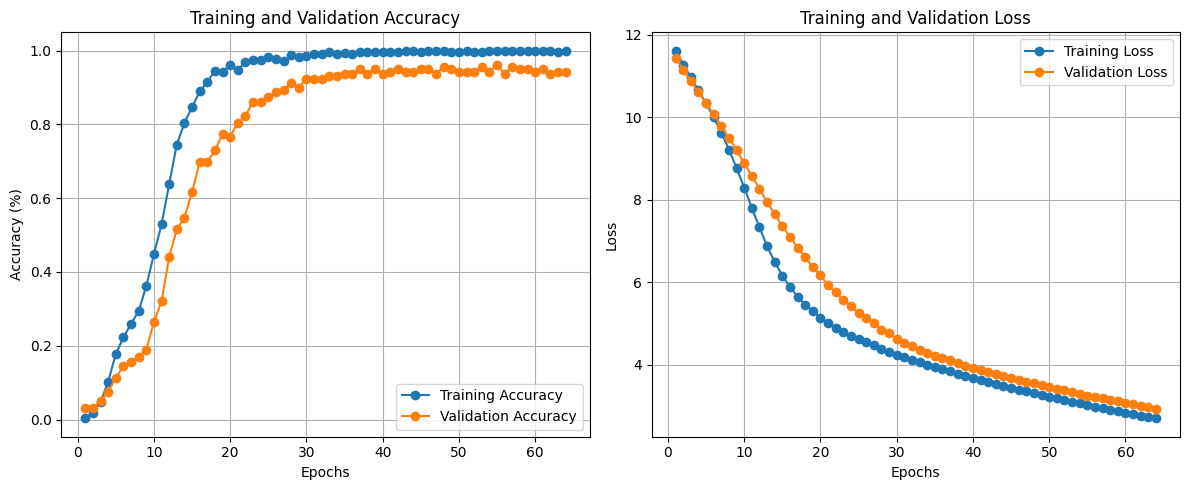

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the history object
epochs_range = range(1, epochs + 1)  # Epoch numbers
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
